In [1]:

# Convert to UTF-8 as is required (only once to create the utf-8 file)
with open("data.csv", "r") as f, open("data_utf8.csv", "w", encoding="utf-8") as out:
    out.write(f.read())

"""
UTF-8 (Unicode Transformation Format - 8-bit) is a character encoding standard that encodes all possible characters (known as code points) in Unicode using one to four bytes. 
It is one of the most widely used encodings for web pages, emails, and file storage due to its efficiency and compatibility with various systems.
"""

'\nUTF-8 (Unicode Transformation Format - 8-bit) is a character encoding standard that encodes all possible characters (known as code points) in Unicode using one to four bytes. \nIt is one of the most widely used encodings for web pages, emails, and file storage due to its efficiency and compatibility with various systems.\n'

In [2]:
#importing essential libs
import pandas as pd
df2 = pd.read_csv("data_utf8.csv")
df2.info()
df2.shape

C:\Users\hp\AppData\Local\Temp\ipykernel_22320\3934227338.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("data_utf8.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

(435742, 13)

In [3]:
#converting objects into categorical data
df3 = df2.astype({"stn_code":"category", "state":"category","location":"category", "agency":"category", "type":"category", "location_monitoring_station":"category", "date":"category"}) # astype is used for type-casting in python
#sampling date is not transferred into category
df3.info()
df3.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   stn_code                     291665 non-null  category
 1   sampling_date                435739 non-null  object  
 2   state                        435742 non-null  category
 3   location                     435739 non-null  category
 4   agency                       286261 non-null  category
 5   type                         430349 non-null  category
 6   so2                          401096 non-null  float64 
 7   no2                          419509 non-null  float64 
 8   rspm                         395520 non-null  float64 
 9   spm                          198355 non-null  float64 
 10  location_monitoring_station  408251 non-null  category
 11  pm2_5                        9314 non-null    float64 
 12  date                         435735 non-null

(435742, 13)

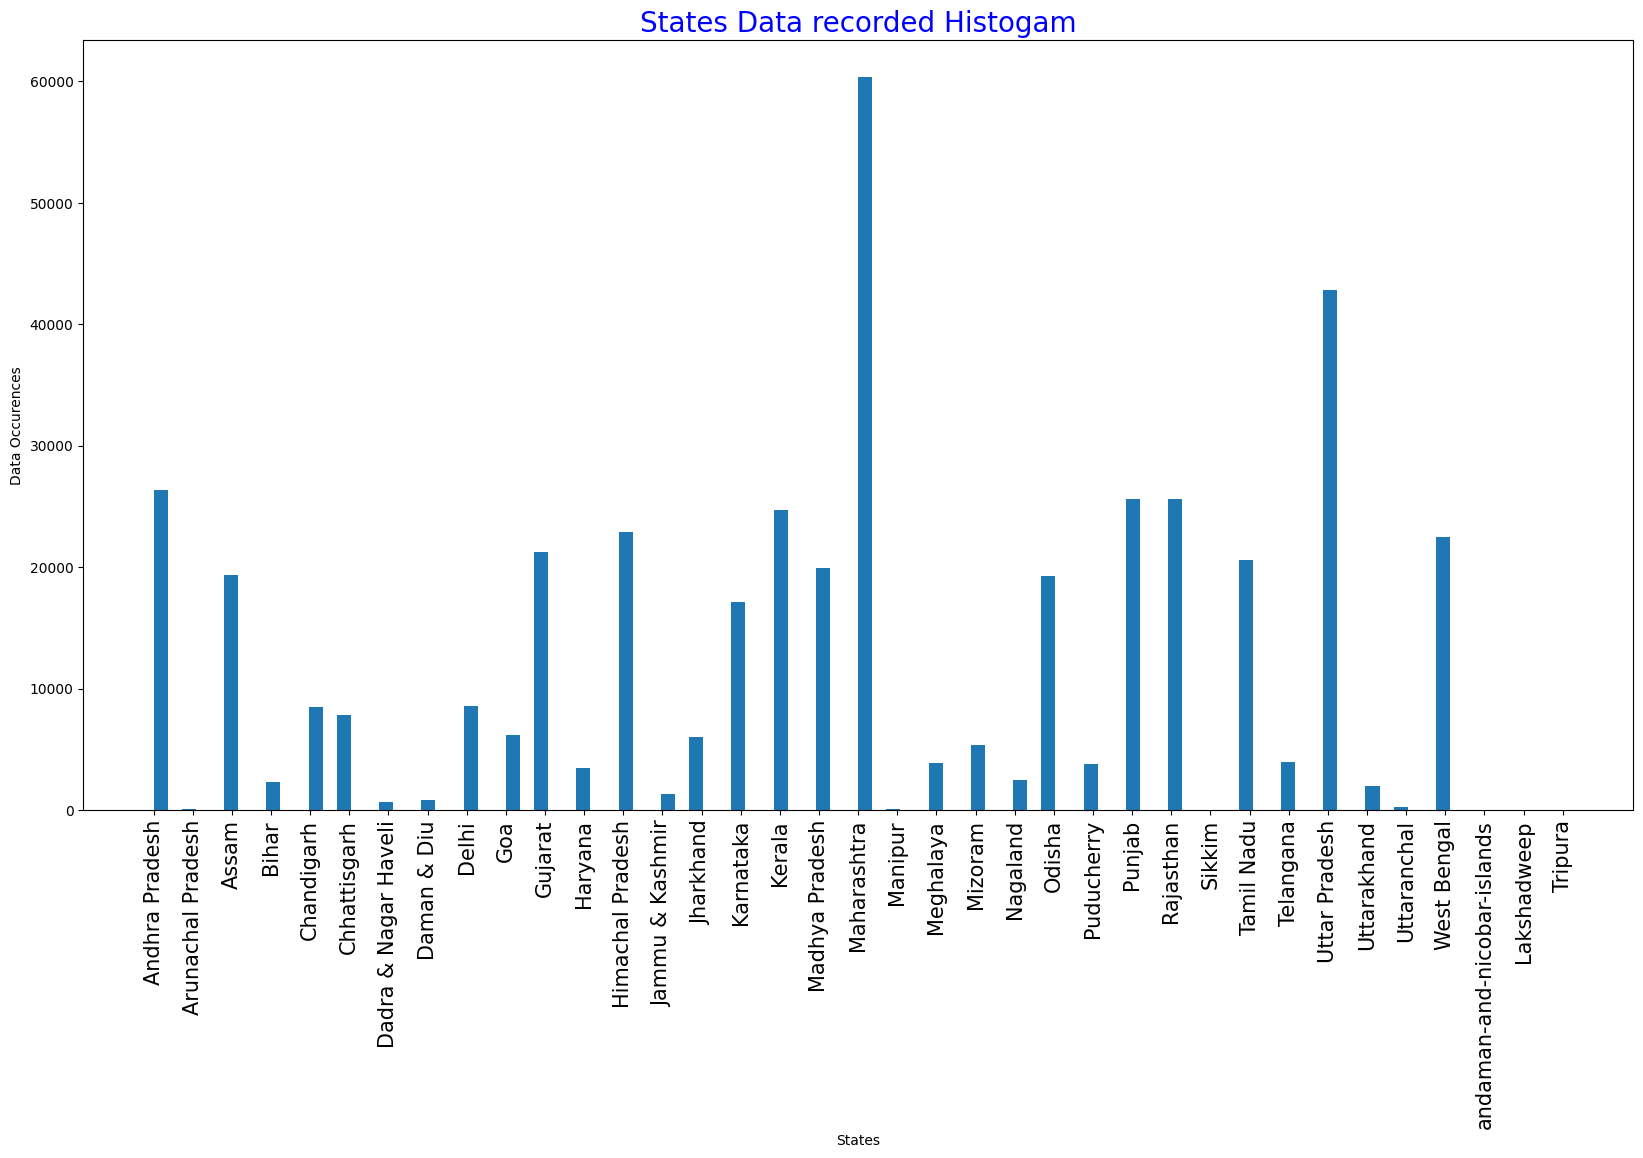

(435742, 13)

In [4]:
#graphical analysis
#state 
import matplotlib.pyplot as plt
plt.figure(figsize= (20,10))
plt.hist(df2["state"], bins = 100)
plt.title("States Data recorded Histogam" , fontsize=20, color="blue")
plt.xlabel("States")
plt.ylabel("Data Occurences")

# Rotate x-axis labels vertically
plt.xticks(rotation=90, fontsize=15)
plt.show()
df2.shape

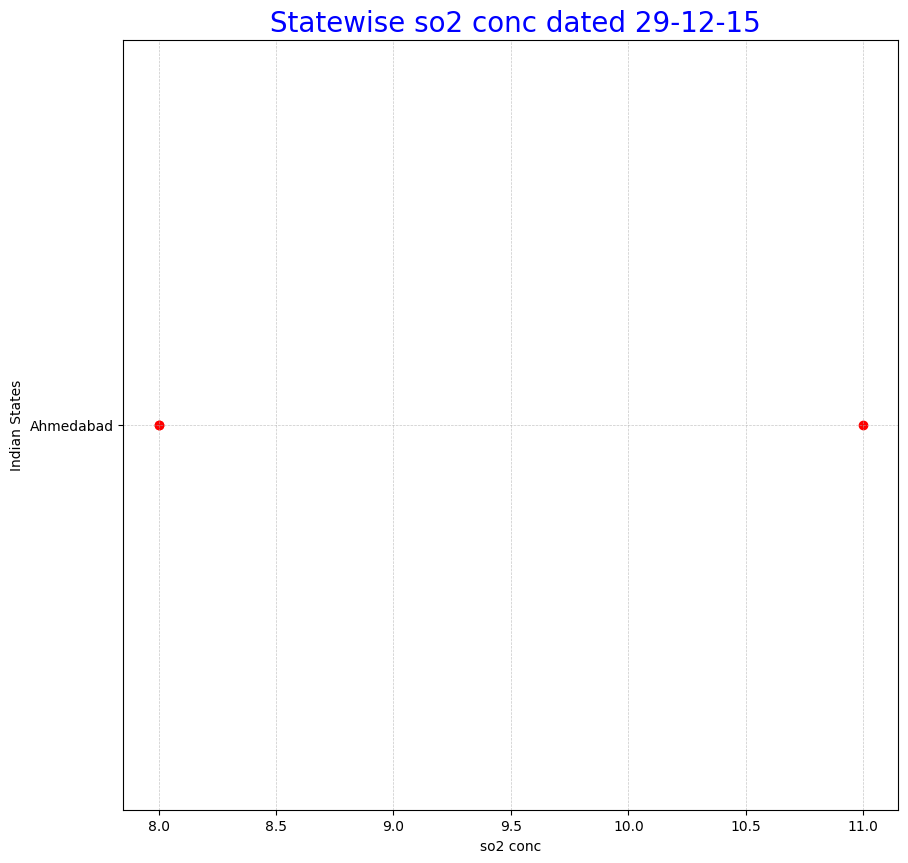

(435742, 13)

In [5]:
# Filter the dataset for the specific date
specific_date = "29-12-15"
specific_state = "Gujarat"
df4 = df2[(df2["sampling_date"] == specific_date) & (df2["state"] == specific_state)] # in case of showing state wise

#also making a scatter graph for price and area
y = df4["location"]
x = df4["so2"]
plt.figure(figsize= (10,10))
plt.scatter(x, y, color ="red")
plt.title(" Statewise so2 conc dated 29-12-15", fontsize=20, color="blue")
plt.ylabel("Indian States")
plt.xlabel("so2 conc")

# Rotate x-axis labels vertically
#plt.xticks(rotation=90, fontsize=8)

# Add grid
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()
df2.shape

(435742, 13)

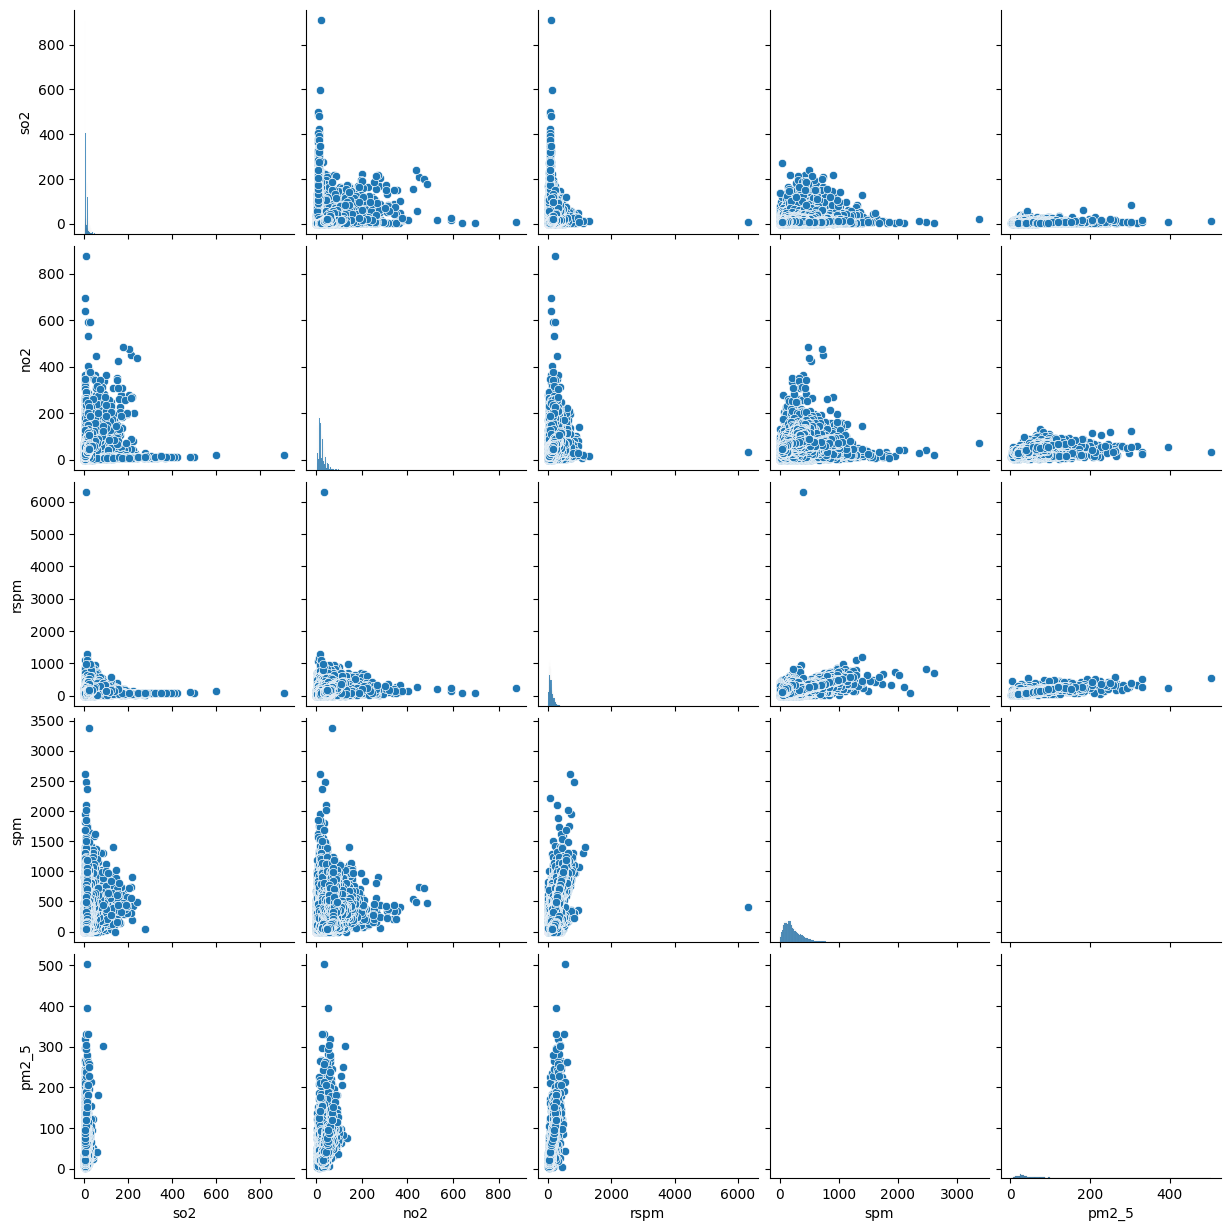

In [6]:
#also making a pair plot
import seaborn as sns
sns.pairplot(df3)
df3.shape

(435742, 13)

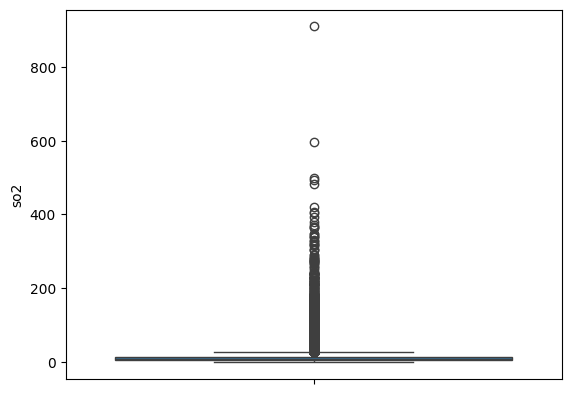

In [7]:
#checking outliers in prices via boxplot  (not informative in this case)
# we will use seaborn
sns.boxplot(df2["so2"])
df2.shape

# Not informative and useful

In [8]:
from sklearn.preprocessing import LabelEncoder

# Dictionary to store encoders for each column
encoders = {}

# List of columns to convert
columns_to_convert = ["stn_code", "state", "location", "agency", "type", 
                      "location_monitoring_station", "date"]  #sampling date removed from here

# Convert columns to string type
for column in columns_to_convert:
    df3[column] = df3[column].astype(str)

# Apply LabelEncoder to each column
for column in columns_to_convert:
    le = LabelEncoder()
    df3[column] = le.fit_transform(df3[column])
    encoders[column] = le  # Save the encoder

# Check the resulting DataFrame
print(df3.head())
print(df3.dtypes)


   stn_code       sampling_date  state  location  agency  type  so2   no2  \
0        65  February - M021990      0       114      64     6  4.8  17.4   
1        66  February - M021990      0       114      64     1  3.1   7.0   
2        67  February - M021990      0       114      64     6  6.2  28.5   
3        65     March - M031990      0       114      64     6  6.3  14.7   
4        66     March - M031990      0       114      64     1  4.7   7.5   

   rspm  spm  location_monitoring_station  pm2_5  date  
0   NaN  NaN                          990    NaN   213  
1   NaN  NaN                          990    NaN   213  
2   NaN  NaN                          990    NaN   213  
3   NaN  NaN                          990    NaN   214  
4   NaN  NaN                          990    NaN   214  
stn_code                         int32
sampling_date                   object
state                            int32
location                         int32
agency                           int32


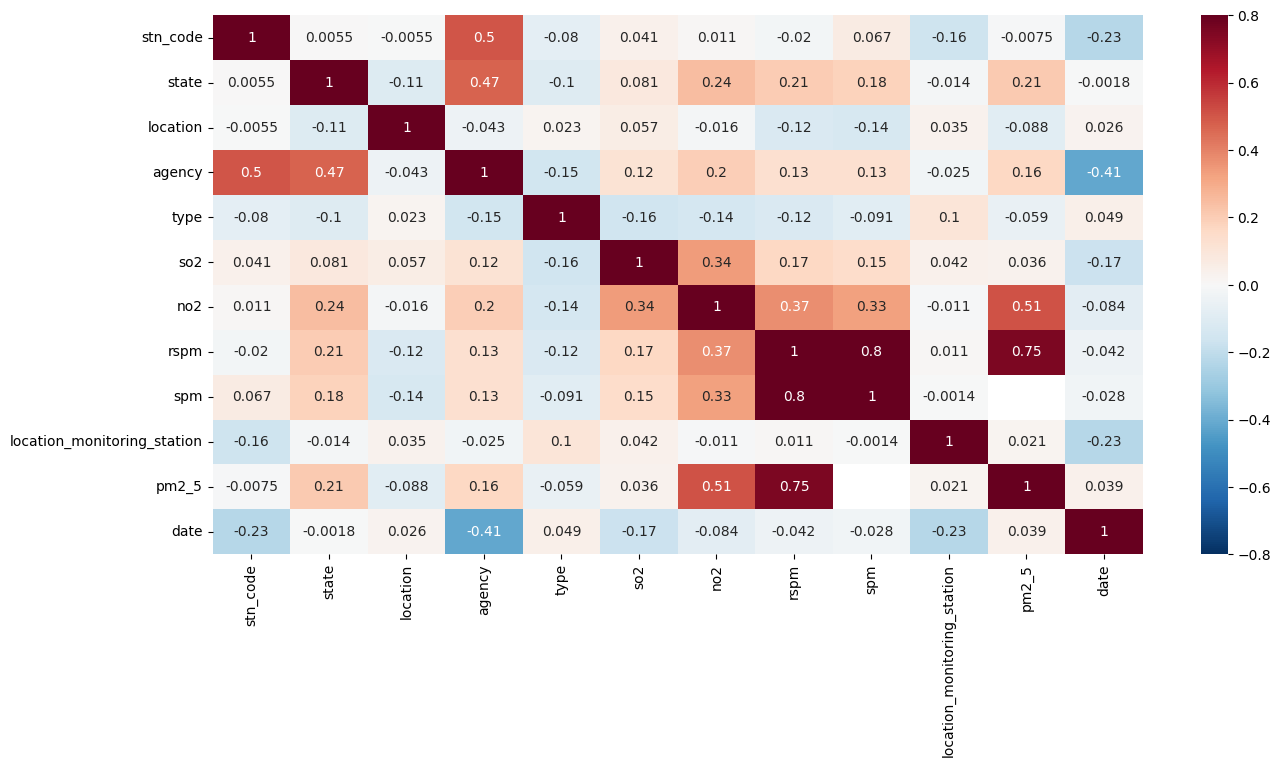

In [9]:
#creating Correlation Heatmap
df_corr = df3.drop(columns=["sampling_date"])
cor = df_corr.corr()
plt.figure(figsize=(15,7))
heatmap = sns.heatmap(cor, annot=True, linewidths=0, vmin=-0.8, vmax=0.8, cmap="RdBu_r")

In [10]:
print(df3.isnull().sum())


stn_code                            0
sampling_date                       3
state                               0
location                            0
agency                              0
type                                0
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station         0
pm2_5                          426428
date                                0
dtype: int64
